In [1]:
import pandas as pd
import os

In [2]:
betas_train_path = '../data/processed/concatenated_data_pq/split_0/betas_train.pq'
se_train_path = '../data/processed/concatenated_data_pq/split_0/se_train.pq'

In [3]:
betas_df = pd.read_parquet(betas_train_path)
se_df = pd.read_parquet(se_train_path)

In [4]:
# cv is nan only for cluster 0
betas_df[betas_df['cv_idx'].isna()]['cluster_num'].unique()

array([0])

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

feature_cols = [v for v in betas_df.columns if 'beta' in v]
X = betas_df[feature_cols]
y = betas_df['cluster_num'].values

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. LDA
lda = LinearDiscriminantAnalysis(n_components=len(np.unique(y)) - 1)
X_lda = lda.fit_transform(X_scaled, y)  # shape: (n_samples, n_components)


In [50]:
# y

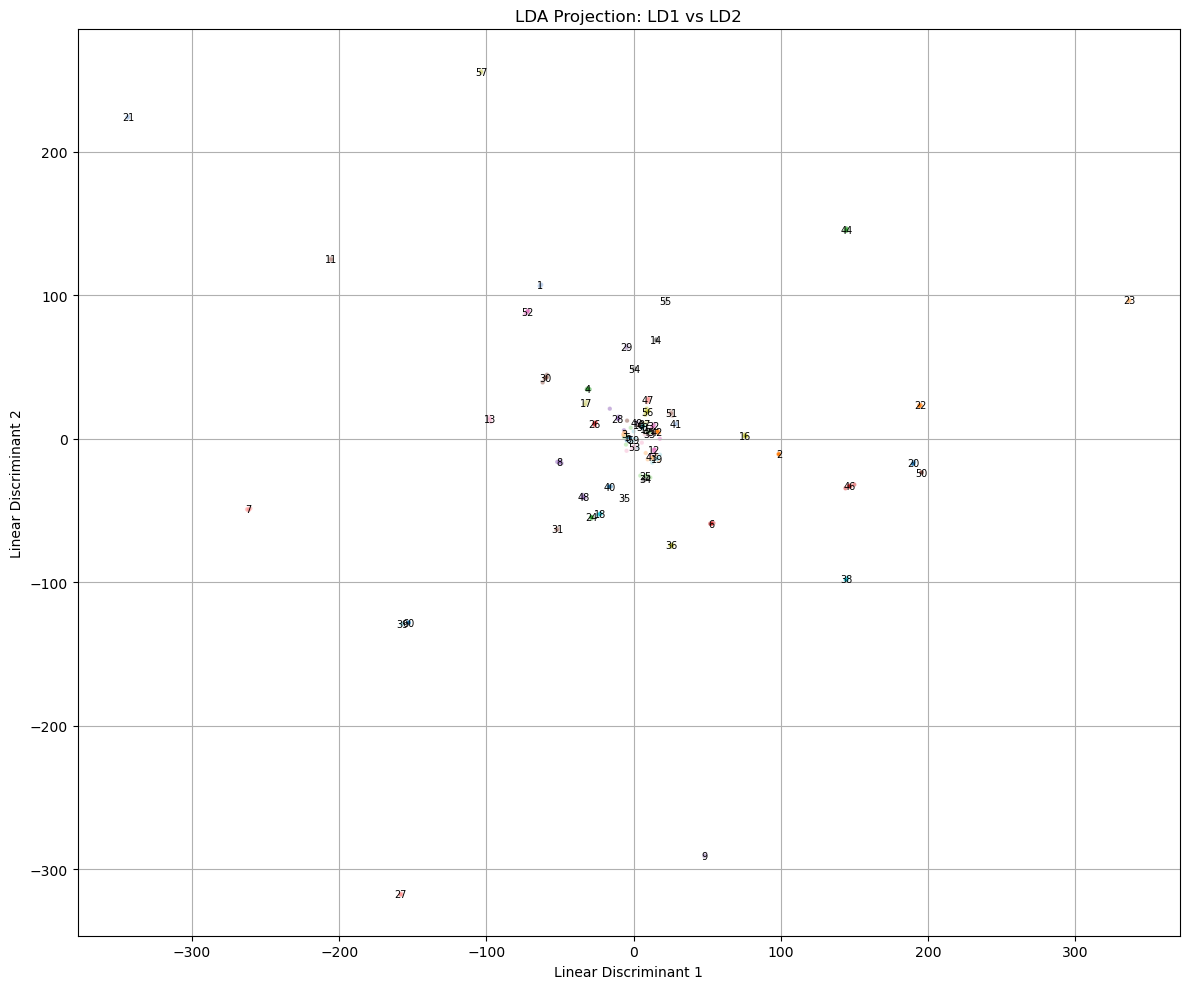

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame for plotting
df_lda = pd.DataFrame(X_lda[:, :2], columns=['LD1', 'LD2'])
df_lda['cluster_num'] = y

# Plot with centroids
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_lda, x='LD1', y='LD2', hue='cluster_num', palette='tab20', s=10, legend=False, alpha=0.5)

# Add centroids
centroids_lda = df_lda.groupby('cluster_num')[['LD1', 'LD2']].mean()
for cluster_id, (ld1, ld2) in centroids_lda.iterrows():
    plt.text(ld1, ld2, str(cluster_id), fontsize=7, ha='center', va='center')

plt.title('LDA Projection: LD1 vs LD2')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.grid(True)
plt.tight_layout()
plt.show()
